## National Football League 

### 2019 - 2020 season

In [72]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",1500)

#### Parsing dates

In [73]:
def parseDate(df):
    for index,x in enumerate(df["Date"]):
        # date is in format MMDD
        # from August to September
        if (int(x) > 800 and int(x) < 1231 and len(str(x)) == 3):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["Date"].iloc[index] = month + "/" + day + "/" + "2019"
            print("changed: %s" % df["Date"].iloc[index])
        # October to December
        elif (int(x) > 800 and int(x) < 1231 and len(str(x)) == 4):
            month = str(x)[:2]
            day = str(x)[2:]
            df["Date"].iloc[index] = month + "/" + day + "/" + "2019"
            print("changed: %s" % df["Date"].iloc[index])
        elif (int(x) < 800):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["Date"].iloc[index] = month + "/" + day + "/" + "2020"
            

In [74]:
nflDf = pd.read_csv("../csv_files/sbro/nfl/nfl_2019_sbro.csv")


### Rename column(s)

In [75]:
nflDf.rename(columns={"ML": "american_odds"},inplace=True)

In [76]:
nflDf.set_index(["Date"])

,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,american_odds,2H
Date,,,,,,,,,,,,
905,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0
905,452,H,Chicago,3,0,0,0,3,3.5,3.0,-160,3.0
908,453,V,Atlanta,0,0,0,12,12,47.5,46.5,160,2.5
908,454,H,Minnesota,14,7,7,0,28,4.5,3.5,-190,22.5
908,455,V,Washington,10,10,0,7,27,46.5,44.0,425,23.0
908,456,H,Philadelphia,0,7,14,11,32,8.0,10.0,-600,8.0
908,457,V,Buffalo,0,0,3,14,17,38.5,41.0,120,0.5
908,458,H,NYJets,6,0,10,0,16,3.5,2.5,-140,20.0
908,459,V,Baltimore,21,21,10,7,59,3.5,7.0,-360,0.5


In [77]:
nflDf["Date"].sample(50)

500     104
20      908
177    1013
100     929
472    1229
417    1215
423    1215
466    1222
41      915
200    1020
268    1110
101     929
512     112
140    1006
366    1201
210    1027
180    1017
502     104
147    1006
279    1110
27      908
88      922
489    1229
334    1124
352    1201
372    1201
109     929
98      929
132    1006
246    1103
401    1208
288    1111
179    1014
105     929
389    1208
453    1222
487    1229
285    1110
370    1201
296    1117
387    1208
160    1013
254    1103
85      922
229    1027
337    1124
501     104
407    1212
298    1117
90      922
Name: Date, dtype: int64

In [78]:
parseDate(nflDf).sample(50)

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


changed: 9/05/2019
changed: 9/05/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/08/2019
changed: 9/09/2019
changed: 9/09/2019
changed: 9/12/2019
changed: 9/12/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/15/2019
changed: 9/1

AttributeError: 'NoneType' object has no attribute 'sample'

In [79]:
nflDf["Date"].sample(75)

44      9/15/2019
515     1/12/2020
416    12/15/2019
3       9/08/2019
474    12/29/2019
181    10/17/2019
72      9/22/2019
34      9/15/2019
475    12/29/2019
161    10/13/2019
130    10/06/2019
216    10/27/2019
68      9/22/2019
184    10/20/2019
512     1/12/2020
22      9/08/2019
4       9/08/2019
350    12/01/2019
374    12/02/2019
60      9/16/2019
94      9/26/2019
9       9/08/2019
47      9/15/2019
325    11/24/2019
390    12/08/2019
285    11/10/2019
164    10/13/2019
274    11/10/2019
142    10/06/2019
16      9/08/2019
123     9/30/2019
17      9/08/2019
477    12/29/2019
113     9/29/2019
104     9/29/2019
519     1/19/2020
466    12/22/2019
198    10/20/2019
41      9/15/2019
264    11/07/2019
116     9/29/2019
372    12/01/2019
136    10/06/2019
131    10/06/2019
165    10/13/2019
483    12/29/2019
54      9/15/2019
326    11/24/2019
317    11/19/2019
2       9/08/2019
358    12/01/2019
382    12/08/2019
485    12/29/2019
320    11/24/2019
311    11/17/2019
393    12/

### Copy dataframe

In [80]:
dfCopy = nflDf.copy(deep=True)

### Summary

In [100]:
dfCopy.describe()

,Rot,1st,2nd,3rd,4th,Final,Open,Close,american_odds,2H
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,334.611111,4.597701,6.963602,4.961686,6.153257,22.779693,25.521073,25.463602,-54.296935,12.781609
std,125.441853,4.730657,5.431180,4.793076,5.215829,10.119977,20.434050,20.208358,465.770266,9.847893
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5000.000000,0.000000
25%,261.000000,0.000000,3.000000,0.000000,0.000000,16.000000,4.500000,5.000000,-240.000000,3.000000
50%,307.000000,3.000000,7.000000,3.000000,7.000000,23.000000,28.250000,28.750000,-110.000000,12.500000
75%,463.000000,7.000000,10.000000,7.000000,9.000000,30.000000,46.000000,45.500000,190.000000,22.500000
max,490.000000,21.000000,28.000000,28.000000,24.000000,59.000000,54.500000,55.500000,1500.000000,29.000000


In [81]:
nflDf.head(100)

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,american_odds,2H
0,9/05/2019,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0
1,9/05/2019,452,H,Chicago,3,0,0,0,3,3.5,3.0,-160,3.0
2,9/08/2019,453,V,Atlanta,0,0,0,12,12,47.5,46.5,160,2.5
3,9/08/2019,454,H,Minnesota,14,7,7,0,28,4.5,3.5,-190,22.5
4,9/08/2019,455,V,Washington,10,10,0,7,27,46.5,44.0,425,23.0
5,9/08/2019,456,H,Philadelphia,0,7,14,11,32,8.0,10.0,-600,8.0
6,9/08/2019,457,V,Buffalo,0,0,3,14,17,38.5,41.0,120,0.5
7,9/08/2019,458,H,NYJets,6,0,10,0,16,3.5,2.5,-140,20.0
8,9/08/2019,459,V,Baltimore,21,21,10,7,59,3.5,7.0,-360,0.5
9,9/08/2019,460,H,Miami,0,10,0,0,10,36.5,40.5,280,18.5


In [82]:
nflDf["american_odds"].unique().tolist()

[140,
 -160,
 160,
 -190,
 425,
 -600,
 120,
 -140,
 -360,
 280,
 100,
 -120,
 215,
 -265,
 -125,
 105,
 -150,
 130,
 375,
 -500,
 240,
 -300,
 270,
 -340,
 260,
 -330,
 235,
 -290,
 150,
 -180,
 -110,
 550,
 -800,
 -2500,
 1100,
 180,
 -220,
 -310,
 250,
 290,
 -380,
 185,
 -230,
 210,
 -260,
 350,
 -450,
 1400,
 -4000,
 1500,
 -5000,
 200,
 -250,
 115,
 -135,
 145,
 -170,
 -240,
 190,
 170,
 -200,
 205,
 -255,
 300,
 -400,
 -900,
 600,
 125,
 -145,
 110,
 -130,
 -175,
 155,
 135,
 -155,
 -185,
 -1400,
 800,
 195,
 -245,
 450,
 -650,
 850,
 -1500,
 400,
 -550,
 -115,
 220,
 -270,
 230,
 -280,
 -105,
 525,
 -750,
 500,
 -700,
 -480,
 365,
 -210,
 175,
 -350,
 275,
 165,
 -195,
 255,
 -320,
 -390,
 295,
 142,
 -165,
 -275,
 225,
 325,
 -425,
 330,
 -430,
 -1000,
 650,
 900,
 -1600]

### Update spread

In [83]:
dfCopy["open_spread"] = ""   
dfCopy["close_spread"] = ""
dfCopy["open_total"] = ""
dfCopy["close_total"] = ""
    
# read 2 rows at a time    
for index,row in nflDf.groupby(nflDf.index // 2):
    print("index: %s" % index)
    # print(row)

    if (row["american_odds"].iloc[0] < 0):
        print(row)
        dfCopy["open_spread"].iloc[row.index[0]] = row["Open"].iloc[0] * -1
        dfCopy["close_spread"].iloc[row.index[0]] = row["Close"].iloc[0] * -1
        dfCopy["open_total"].iloc[row.index[0]] = row["Open"].iloc[1]
        dfCopy["close_total"].iloc[row.index[0]] = row["Close"].iloc[1]
        
        dfCopy["open_spread"].iloc[row.index[1]] = row["Open"].iloc[0]
        dfCopy["close_spread"].iloc[row.index[1]] = row["Close"].iloc[0]
        dfCopy["open_total"].iloc[row.index[1]] = row["Open"].iloc[1]
        dfCopy["close_total"].iloc[row.index[1]] = row["Close"].iloc[1]
        
    # money line is positive
    elif (row["american_odds"].iloc[0] > 0):
        dfCopy["open_total"].iloc[row.index[0]] = row["Open"].iloc[0]
        dfCopy["close_total"].iloc[row.index[0]] = row["Close"].iloc[0]
        dfCopy["open_spread"].iloc[row.index[0]] = row["Open"].iloc[1]
        dfCopy["close_spread"].iloc[row.index[0]] = row["Close"].iloc[1]
        
        dfCopy["open_total"].iloc[row.index[1]] = row["Open"].iloc[0]
        dfCopy["close_total"].iloc[row.index[1]] = row["Close"].iloc[0]
        dfCopy["open_spread"].iloc[row.index[1]] = row["Open"].iloc[1] * -1
        dfCopy["close_spread"].iloc[row.index[1]] = row["Close"].iloc[1] * -1
    

index: 0
index: 1
index: 2
index: 3
index: 4
        Date  Rot VH       Team  1st  2nd  3rd  4th  Final  Open  Close  \
8  9/08/2019  459  V  Baltimore   21   21   10    7     59   3.5    7.0   
9  9/08/2019  460  H      Miami    0   10    0    0     10  36.5   40.5   

   american_odds    2H  
8           -360   0.5  
9            280  18.5  
index: 5
index: 6
         Date  Rot VH          Team  1st  2nd  3rd  4th  Final  Open  Close  \
12  9/08/2019  463  V    KansasCity   17    6    7   10     40   5.0    3.5   
13  9/08/2019  464  H  Jacksonville    7    6    0   13     26  52.5   49.0   

    american_odds    2H  
12           -190   3.0  
13            160  24.0  
index: 7
index: 8
         Date  Rot VH      Team  1st  2nd  3rd  4th  Final  Open  Close  \
16  9/08/2019  467  V    LARams    0   13   10    7     30   3.0    1.5   
17  9/08/2019  468  H  Carolina    0    3   10   14     27  50.5   49.0   

    american_odds    2H  
16           -125  24.0  
17            105   1.5 

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g


index: 31
         Date  Rot VH          Team  1st  2nd  3rd  4th  Final  Open  Close  \
62  9/19/2019  301  V     Tennessee    0    0    0    7      7   2.5    1.5   
63  9/19/2019  302  H  Jacksonville   14    0    3    3     20  41.0   38.0   

    american_odds    2H  
62           -125   3.5  
63            105  17.0  
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
index: 41
index: 42
index: 43
index: 44
index: 45
         Date  Rot VH       Team  1st  2nd  3rd  4th  Final  Open  Close  \
90  9/22/2019  487  V     LARams    3    0    7   10     20   2.5    4.5   
91  9/22/2019  488  H  Cleveland    0    6    7    0     13  51.0   48.0   

    american_odds    2H  
90           -220   5.5  
91            180  24.0  
index: 46
         Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open  Close  \
92  9/23/2019  489  V     Chicago    7   21    0    3     31   4.0    4.5   
93  9/23/2019  490  H  Washington    0    3    6    6     15  

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g


index: 68
           Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open  Close  \
136  10/06/2019  461  V  NewEngland    6    6   14    7     33  13.0   16.5   
137  10/06/2019  462  H  Washington    7    0    0    0      7  47.5   42.0   

     american_odds    2H  
136          -1400   7.0  
137            800  20.0  
index: 69
index: 70
index: 71
index: 72
index: 73
index: 74
index: 75
index: 76
index: 77
index: 78
index: 79
index: 80
index: 81
index: 82
index: 83
           Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open  Close  \
166  10/13/2019  263  V  Washington    0    7   10    0     17   5.0    6.0   
167  10/13/2019  264  H       Miami    0    3    0   13     16  41.0   42.5   

     american_odds    2H  
166           -260   3.0  
167            210  19.5  
index: 84
index: 85
           Date  Rot VH     Team  1st  2nd  3rd  4th  Final  Open  Close  \
170  10/13/2019  267  V  Atlanta    7    3   10   13     33   3.0    3.0   
171  10/13/2019  268  H  Ariz

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

index: 103
index: 104
index: 105
index: 106
index: 107
           Date  Rot VH     Team  1st  2nd  3rd  4th  Final  Open  Close  \
214  10/27/2019  257  V  Seattle    3   21    0    3     27   3.0    7.5   
215  10/27/2019  258  H  Atlanta    0    0   11    9     20  54.0   49.0   

     american_odds    2H  
214           -400   1.5  
215            300  22.0  
index: 108
index: 109
           Date  Rot VH          Team  1st  2nd  3rd  4th  Final  Open  Close  \
218  10/27/2019  261  V  Philadelphia    3    8   13    7     31  41.5   38.5   
219  10/27/2019  262  H       Buffalo    0    7    6    0     13   2.5    1.0   

     american_odds    2H  
218           -105  17.5  
219           -115   1.0  
index: 110
index: 111
index: 112
index: 113
index: 114
index: 115
index: 116
           Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open  Close  \
232  10/27/2019  275  V    GreenBay   14    0    3   14     31   3.5    5.0   
233  10/27/2019  276  H  KansasCity    0   17    0   

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g


           Date  Rot VH      Team  1st  2nd  3rd  4th  Final  Open  Close  \
272  11/10/2019  257  V  NYGiants    0   13   14    0     27   0.0    3.0   
273  11/10/2019  258  H    NYJets   14    0   10   10     34  41.0   43.0   

     american_odds    2H  
272           -155   2.5  
273            135  21.0  
index: 137
index: 138
           Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open  Close  \
276  11/10/2019  261  V   Baltimore   14   14   21    0     49  10.0   10.5   
277  11/10/2019  262  H  Cincinnati    0   10    0    3     13  46.0   44.5   

     american_odds    2H  
276           -600   3.5  
277            425  22.5  
index: 139
index: 140
index: 141
index: 142
           Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open  Close  \
284  11/10/2019  269  V      LARams    7    0    3    2     12   3.0    4.5   
285  11/10/2019  270  H  Pittsburgh    7    7    0    3     17  45.5   43.5   

     american_odds    2H  
284           -220   3.5  
285      

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g


           Date  Rot VH     Team  1st  2nd  3rd  4th  Final  Open  Close  \
344  11/28/2019  305  V  Chicago    7    3    7    7     24   1.0    5.5   
345  11/28/2019  306  H  Detroit   14    3    0    3     20  41.0   37.0   

     american_odds    2H  
344           -270   4.0  
345            220  20.0  
index: 173
index: 174
           Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open  Close  \
348  11/28/2019  309  V  NewOrleans    7   10    3    6     26   5.0    7.0   
349  11/28/2019  310  H     Atlanta    0    9    0    9     18  48.0   47.5   

     american_odds    2H  
348           -390   3.0  
349            295  23.5  
index: 175
           Date  Rot VH      Team  1st  2nd  3rd  4th  Final  Open  Close  \
350  12/01/2019  451  V  GreenBay   14    3    0   14     31   7.5    6.5   
351  12/01/2019  452  H  NYGiants    7    3    3    0     13  47.0   43.5   

     american_odds    2H  
350           -330   3.0  
351            260  21.0  
index: 176
index: 177
in

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

index: 201
index: 202
index: 203
index: 204
           Date  Rot VH      Team  1st  2nd  3rd  4th  Final  Open  Close  \
408  12/15/2019  305  V  TampaBay   14    7    3   14     38   3.0    6.0   
409  12/15/2019  306  H   Detroit    0    3    7    7     17  47.5   46.5   

     american_odds    2H  
408           -275   2.5  
409            225  21.0  
index: 205
           Date  Rot VH          Team  1st  2nd  3rd  4th  Final  Open  Close  \
410  12/15/2019  307  V  Philadelphia    3    7    7   20     37   6.0    6.5   
411  12/15/2019  308  H    Washington    7    7    0   13     27  40.0   39.0   

     american_odds    2H  
410           -310   6.0  
411            250  20.5  
index: 206
index: 207
           Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open  Close  \
414  12/15/2019  311  V  NewEngland    7    6   14    7     34  11.0   10.5   
415  12/15/2019  312  H  Cincinnati   10    0    0    3     13  40.0   42.0   

     american_odds    2H  
414           -650  

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g


           Date  Rot VH       Team  1st  2nd  3rd  4th  Final  Open  Close  \
472  12/29/2019  105  V    Chicago    6    5    7    3     21   7.0    5.0   
473  12/29/2019  106  H  Minnesota    0    6    0   13     19  41.5   35.5   

     american_odds    2H  
472           -250   2.5  
473            200  17.0  
index: 237
           Date  Rot VH          Team  1st  2nd  3rd  4th  Final  Open  Close  \
474  12/29/2019  107  V  Indianapolis   10   10    0    0     20   1.0    5.5   
475  12/29/2019  108  H  Jacksonville    3   13    8   14     38  44.5   41.5   

     american_odds    2H  
474           -250   0.5  
475            200  22.0  
index: 238
index: 239
index: 240
           Date  Rot VH        Team  1st  2nd  3rd  4th  Final  Open  Close  \
480  12/29/2019  113  V  NewOrleans   14   21    7    0     42  11.0   14.5   
481  12/29/2019  114  H    Carolina    0    3    7    0     10  48.0   45.0   

     american_odds    2H  
480          -1000   3.5  
481            650  19

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [84]:
dfCopy.head(50)

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,american_odds,2H,open_spread,close_spread,open_total,close_total
0,9/05/2019,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0,3.5,3.0,46.0,46.5
1,9/05/2019,452,H,Chicago,3,0,0,0,3,3.5,3.0,-160,3.0,-3.5,-3.0,46.0,46.5
2,9/08/2019,453,V,Atlanta,0,0,0,12,12,47.5,46.5,160,2.5,4.5,3.5,47.5,46.5
3,9/08/2019,454,H,Minnesota,14,7,7,0,28,4.5,3.5,-190,22.5,-4.5,-3.5,47.5,46.5
4,9/08/2019,455,V,Washington,10,10,0,7,27,46.5,44.0,425,23.0,8.0,10.0,46.5,44.0
5,9/08/2019,456,H,Philadelphia,0,7,14,11,32,8.0,10.0,-600,8.0,-8.0,-10.0,46.5,44.0
6,9/08/2019,457,V,Buffalo,0,0,3,14,17,38.5,41.0,120,0.5,3.5,2.5,38.5,41.0
7,9/08/2019,458,H,NYJets,6,0,10,0,16,3.5,2.5,-140,20.0,-3.5,-2.5,38.5,41.0
8,9/08/2019,459,V,Baltimore,21,21,10,7,59,3.5,7.0,-360,0.5,-3.5,-7.0,36.5,40.5
9,9/08/2019,460,H,Miami,0,10,0,0,10,36.5,40.5,280,18.5,3.5,7.0,36.5,40.5


### Probability odds

In [85]:
dfCopy["probability_odds"] = ""

for index,row in dfCopy.iterrows():
    print(index)
    # check for null values
    if (not np.isnan(dfCopy["american_odds"].iloc[index])):
        if (re.search(r"-",dfCopy["american_odds"].iloc[index].astype(str))):
            print(dfCopy["american_odds"].iloc[index])
            result = (-1.0 * (dfCopy["american_odds"].iloc[index].astype(float)) / 
                ((-1.0 * dfCopy["american_odds"].iloc[index].astype(float)) + 100.0))
            
            dfCopy["probability_odds"].iloc[index] = round(result * 100,2)
                      
        else:
            result = 100.0 / (dfCopy["american_odds"].iloc[index].astype(float) + 100.0)
            dfCopy["probability_odds"].iloc[index] = round(result * 100,2)
    else:
        dfCopy["probability_odds"].iloc[index] = None

0
1
-160
2
3
-190
4
5
-600
6
7
-140
8
-360
9
10
11
-120
12
-190
13
14
15
-265
16
-125
17
18
-150
19
20
21
-500
22
23
-300
24
25
-340
26
27
-265
28
29
-330
30
31
-290
32
33
-180
34
-110
35
-110
36
-120
37
38
39
-800
40
-2500
41
42
-265
43
44
45
-360
46
47
-220
48
-110
49
-110
50
51
-160
52
-310
53
54
55
-125
56
-150
57
58
-120
59
60
-330
61
62
-125
63
64
65
-380
66
67
-220
68
69
-230
70
71
-260
72
73
-125
74
75
-450
76
77
-4000
78
79
-5000
80
81
-250
82
83
-135
84
85
-250
86
87
-170
88
89
-300
90
-220
91
92
-240
93
94
95
-200
96
97
-255
98
99
-400
100
101
-170
102
-900
103
104
105
-260
106
-400
107
108
-360
109
110
111
-180
112
113
-500
114
-260
115
116
-110
117
-110
118
119
-145
120
-150
121
122
123
-180
124
125
-130
126
-175
127
128
-330
129
130
131
-155
132
133
-185
134
-250
135
136
-1400
137
138
139
-900
140
141
-155
142
143
-220
144
145
-190
146
147
-245
148
149
-185
150
151
-650
152
153
-240
154
155
-1500
156
157
-550
158
159
-120
160
161
-190
162
163
-150
164
165
-185
166
-260
16

C:\Users\TamLe\anaconda3\envs\sports\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



-115
220
221
-750
222
223
-700
224
225
-250
226
227
-220
228
229
-265
230
231
-450
232
-240
233
234
235
-800
236
-480
237
238
239
-120
240
241
-650
242
243
-190
244
245
-250
246
-255
247
248
-190
249
250
251
-125
252
253
-150
254
255
-220
256
-210
257
258
-220
259
260
-160
261
262
-330
263
264
-125
265
266
-250
267
268
269
-170
270
271
-250
272
-155
273
274
275
-900
276
-600
277
278
279
-230
280
281
-300
282
283
-650
284
-220
285
286
287
-185
288
289
-265
290
291
-160
292
-400
293
294
-240
295
296
297
-200
298
299
-140
300
301
-500
302
303
-130
304
-350
305
306
307
-240
308
309
-500
310
-220
311
312
313
-750
314
315
-250
316
-280
317
318
319
-195
320
321
-600
322
323
-200
324
-250
325
326
327
-280
328
-200
329
330
331
-550
332
333
-180
334
-200
335
336
337
-220
338
339
-270
340
341
-170
342
-180
343
344
-270
345
346
347
-320
348
-390
349
350
-330
351
352
353
-600
354
355
-265
356
-115
357
-105
358
-600
359
360
361
-650
362
-170
363
364
-140
365
366
-140
367
368
-220
369
370
-120
371
3

In [86]:
dfCopy.head(55)

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,american_odds,2H,open_spread,close_spread,open_total,close_total,probability_odds
0,9/05/2019,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0,3.5,3.0,46.0,46.5,41.67
1,9/05/2019,452,H,Chicago,3,0,0,0,3,3.5,3.0,-160,3.0,-3.5,-3.0,46.0,46.5,61.54
2,9/08/2019,453,V,Atlanta,0,0,0,12,12,47.5,46.5,160,2.5,4.5,3.5,47.5,46.5,38.46
3,9/08/2019,454,H,Minnesota,14,7,7,0,28,4.5,3.5,-190,22.5,-4.5,-3.5,47.5,46.5,65.52
4,9/08/2019,455,V,Washington,10,10,0,7,27,46.5,44.0,425,23.0,8.0,10.0,46.5,44.0,19.05
5,9/08/2019,456,H,Philadelphia,0,7,14,11,32,8.0,10.0,-600,8.0,-8.0,-10.0,46.5,44.0,85.71
6,9/08/2019,457,V,Buffalo,0,0,3,14,17,38.5,41.0,120,0.5,3.5,2.5,38.5,41.0,45.45
7,9/08/2019,458,H,NYJets,6,0,10,0,16,3.5,2.5,-140,20.0,-3.5,-2.5,38.5,41.0,58.33
8,9/08/2019,459,V,Baltimore,21,21,10,7,59,3.5,7.0,-360,0.5,-3.5,-7.0,36.5,40.5,78.26
9,9/08/2019,460,H,Miami,0,10,0,0,10,36.5,40.5,280,18.5,3.5,7.0,36.5,40.5,26.32


### Point differences

In [87]:
nflDf[["Team","Close"]].groupby(["Team","Close"]).count()

Empty DataFrame
Columns: []
Index: [(Arizona, 2.0), (Arizona, 43.5), (Arizona, 44.0), (Arizona, 46.0), (Arizona, 46.5), (Arizona, 47.5), (Arizona, 48.5), (Arizona, 49.0), (Arizona, 50.0), (Arizona, 51.0), (Arizona, 51.5), (Arizona, 52.5), (Atlanta, 3.0), (Atlanta, 3.5), (Atlanta, 7.0), (Atlanta, 46.5), (Atlanta, 47.5), (Atlanta, 48.0), (Atlanta, 48.5), (Atlanta, 49.0), (Atlanta, 49.5), (Atlanta, 51.5), (Atlanta, 53.0), (Atlanta, 54.5), (Baltimore, 3.0), (Baltimore, 3.5), (Baltimore, 4.5), (Baltimore, 5.5), (Baltimore, 6.0), (Baltimore, 7.0), (Baltimore, 10.0), (Baltimore, 10.5), (Baltimore, 13.0), (Baltimore, 17.0), (Baltimore, 35.0), (Baltimore, 44.0), (Baltimore, 48.0), (Baltimore, 52.0), (Buffalo, 1.0), (Buffalo, 3.5), (Buffalo, 6.0), (Buffalo, 7.0), (Buffalo, 10.5), (Buffalo, 17.0), (Buffalo, 37.0), (Buffalo, 38.5), (Buffalo, 39.0), (Buffalo, 41.0), (Buffalo, 41.5), (Buffalo, 42.0), (Buffalo, 43.0), (Buffalo, 44.5), (Buffalo, 47.0), (Carolina, 3.0), (Carolina, 3.5), (Carolina, 6.5), (Carolina, 10.5), (Carolina, 40.5), (Carolina, 45.0), (Carolina, 45.5), (Carolina, 46.5), (Carolina, 47.5), (Carolina, 48.0), (Carolina, 49.0), (Chicago, 3.0), (Chicago, 3.5), (Chicago, 4.0), (Chicago, 4.5), (Chicago, 5.0), (Chicago, 5.5), (Chicago, 6.0), (Chicago, 6.5), (Chicago, 7.0), (Chicago, 38.5), (Chicago, 40.0), (Chicago, 40.5), (Chicago, 41.0), (Chicago, 43.0), (Chicago, 45.5), (Cincinnati, 1.5), (Cincinnati, 3.0), (Cincinnati, 37.0), (Cincinnati, 42.0), (Cincinnati, 43.0), (Cincinnati, 43.5), (Cincinnati, 44.0), (Cincinnati, 44.5), (Cincinnati, 46.5), (Cincinnati, 47.0), (Cincinnati, 48.0), (Cincinnati, 48.5), (Cleveland, 1.0), (Cleveland, 2.5), (Cleveland, 3.0), (Cleveland, 4.0), (Cleveland, 5.5), (Cleveland, 6.5), (Cleveland, 10.5), (Cleveland, 42.5), (Cleveland, 47.5), ...]

In [88]:
nflDf[["Team","Close"]].groupby("Team").groups

{'Arizona': [19, 38, 83, 115, 130, 171, 182, 222, 237, 270, 308, 367, 399, 429, 464, 494], 'Atlanta': [2, 59, 72, 111, 142, 170, 193, 215, 274, 296, 333, 349, 387, 430, 449, 476], 'Baltimore': [8, 39, 68, 99, 126, 157, 198, 261, 276, 307, 342, 355, 378, 407, 460, 485, 511], 'Buffalo': [6, 36, 71, 109, 144, 187, 219, 241, 268, 304, 323, 346, 379, 424, 440, 487, 500], 'Carolina': [17, 31, 82, 96, 133, 226, 243, 278, 297, 330, 353, 386, 419, 458, 481], 'Chicago': [1, 56, 92, 117, 128, 201, 213, 244, 281, 314, 327, 344, 377, 412, 467, 472], 'Cincinnati': [20, 49, 70, 122, 131, 156, 191, 220, 277, 312, 325, 365, 384, 415, 456, 471], 'Cleveland': [15, 60, 91, 98, 152, 159, 230, 256, 269, 291, 321, 370, 385, 428, 461, 470], 'Dallas': [25, 42, 79, 120, 149, 172, 203, 262, 287, 292, 338, 347, 376, 433, 462, 479], 'Denver': [57, 64, 119, 146, 175, 181, 228, 257, 300, 322, 369, 420, 445, 499], 'Detroit': [18, 35, 66, 107, 178, 209, 252, 280, 293, 334, 345, 388, 409, 444, 491], 'GreenBay': [0, 51,

In [92]:
dfBaltimore = dfCopy[dfCopy["Team"] == "Baltimore"]
print("baltimore first quarter: %s" % dfBaltimore["1st"].mean())
print("baltimore second quarter: %s" % dfBaltimore["2nd"].mean())
print("baltimore third quarter: %s" % dfBaltimore["3rd"].mean())
print("baltimore fourth quarter: %s" % dfBaltimore["4th"].mean())
print("baltimore final mean: %s" % dfBaltimore["Final"].mean())

baltimore first quarter: 7.529411764705882
baltimore second quarter: 9.529411764705882
baltimore third quarter: 6.235294117647059
baltimore fourth quarter: 8.470588235294118
baltimore final mean: 31.941176470588236


In [93]:
nflDf["Close"].unique().tolist()

[46.5,
 3.0,
 3.5,
 44.0,
 10.0,
 41.0,
 2.5,
 7.0,
 40.5,
 51.0,
 1.0,
 49.0,
 5.5,
 1.5,
 46.0,
 44.5,
 9.0,
 6.0,
 52.0,
 6.5,
 48.0,
 43.5,
 0.0,
 13.0,
 18.5,
 48.5,
 43.0,
 47.0,
 4.0,
 53.0,
 52.5,
 45.0,
 38.0,
 4.5,
 21.0,
 22.5,
 45.5,
 2.0,
 5.0,
 49.5,
 47.5,
 14.5,
 7.5,
 54.5,
 41.5,
 38.5,
 37.0,
 40.0,
 16.5,
 42.0,
 14.0,
 55.5,
 10.5,
 17.0,
 42.5,
 50.0,
 9.5,
 11.5,
 12.0,
 39.5,
 51.5,
 39.0,
 50.5,
 13.5,
 11.0,
 37.5,
 8.0,
 36.5,
 35.5,
 35.0]

In [94]:
# dfFilterACR = df[(df["AverageCorrosionRate"] < 1.0) & (df["AverageCorrosionRate"] > -0.2)]
greenBayDf = dfCopy[dfCopy["Team"] == "GreenBay"]
greenBayDf

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,american_odds,2H,open_spread,close_spread,open_total,close_total,probability_odds
0,9/05/2019,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0,3.5,3.0,46.0,46.5,41.67
51,9/15/2019,280,H,GreenBay,14,7,0,0,21,3.0,3.0,-160,23.0,-3.0,-3.0,46.0,43.5,61.54
65,9/22/2019,462,H,GreenBay,7,10,7,3,27,7.0,7.0,-380,2.5,-7.0,-7.0,43.5,41.0,79.17
95,9/26/2019,102,H,GreenBay,7,13,7,0,27,3.0,3.5,-200,3.5,-3.0,-3.5,48.0,46.5,66.67
148,10/06/2019,473,V,GreenBay,14,3,14,3,34,48.0,46.5,155,24.0,4.0,3.0,48.0,46.5,39.22
179,10/14/2019,276,H,GreenBay,0,10,3,10,23,6.5,3.5,-200,4.5,-6.5,-3.5,46.5,46.5,66.67
189,10/20/2019,460,H,GreenBay,7,14,14,7,42,7.5,6.0,-270,0.5,-7.5,-6.0,46.0,47.5,72.97
232,10/27/2019,275,V,GreenBay,14,0,3,14,31,3.5,5.0,-240,3.5,-3.5,-5.0,48.0,48.0,70.59
258,11/03/2019,471,V,GreenBay,0,0,3,8,11,3.5,4.5,-220,6.0,-3.5,-4.5,46.0,50.5,68.75
279,11/10/2019,264,H,GreenBay,7,7,10,0,24,6.0,5.0,-230,2.5,-6.0,-5.0,48.0,49.0,69.7


In [95]:
greenBayDf.set_index(["Date"])

,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,american_odds,2H,open_spread,close_spread,open_total,close_total,probability_odds
Date,,,,,,,,,,,,,,,,,
9/05/2019,451,V,GreenBay,0,7,0,3,10,46.0,46.5,140,23.0,3.5,3.0,46.0,46.5,41.67
9/15/2019,280,H,GreenBay,14,7,0,0,21,3.0,3.0,-160,23.0,-3.0,-3.0,46.0,43.5,61.54
9/22/2019,462,H,GreenBay,7,10,7,3,27,7.0,7.0,-380,2.5,-7.0,-7.0,43.5,41.0,79.17
9/26/2019,102,H,GreenBay,7,13,7,0,27,3.0,3.5,-200,3.5,-3.0,-3.5,48.0,46.5,66.67
10/06/2019,473,V,GreenBay,14,3,14,3,34,48.0,46.5,155,24.0,4.0,3.0,48.0,46.5,39.22
10/14/2019,276,H,GreenBay,0,10,3,10,23,6.5,3.5,-200,4.5,-6.5,-3.5,46.5,46.5,66.67
10/20/2019,460,H,GreenBay,7,14,14,7,42,7.5,6.0,-270,0.5,-7.5,-6.0,46.0,47.5,72.97
10/27/2019,275,V,GreenBay,14,0,3,14,31,3.5,5.0,-240,3.5,-3.5,-5.0,48.0,48.0,70.59
11/03/2019,471,V,GreenBay,0,0,3,8,11,3.5,4.5,-220,6.0,-3.5,-4.5,46.0,50.5,68.75


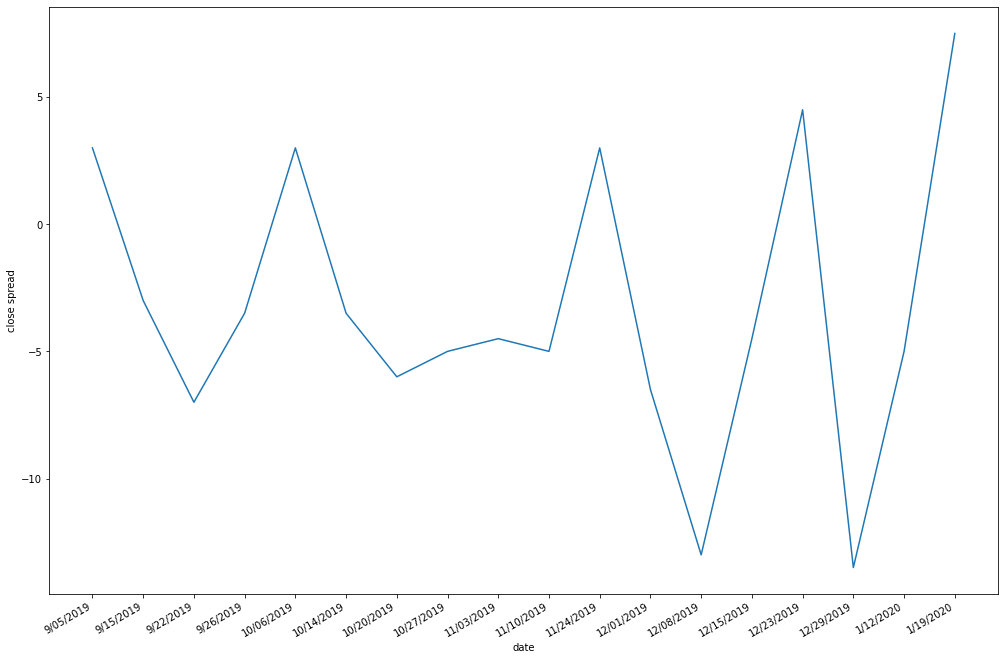

In [96]:
fig,ax = plt.subplots(figsize=(17,12))
ax.plot(greenBayDf["Date"],greenBayDf["close_spread"])
ax.set_ylabel("close spread")
ax.set_xlabel("date")
fig.autofmt_xdate()
plt.show()

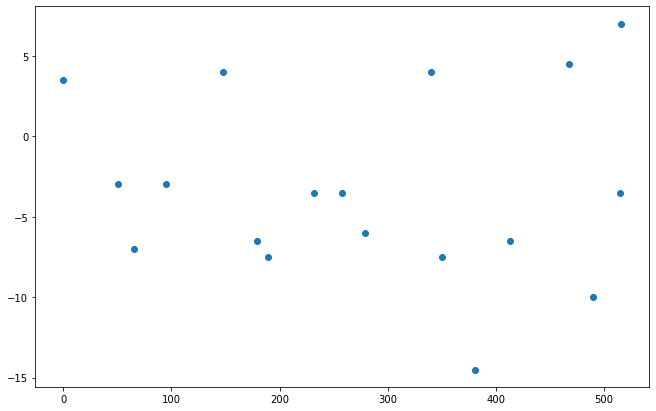

In [97]:
plt.figure(figsize=(11,7))
plt.scatter(x=greenBayDf.index,y=greenBayDf["open_spread"])

### Total distribution

<AxesSubplot:>

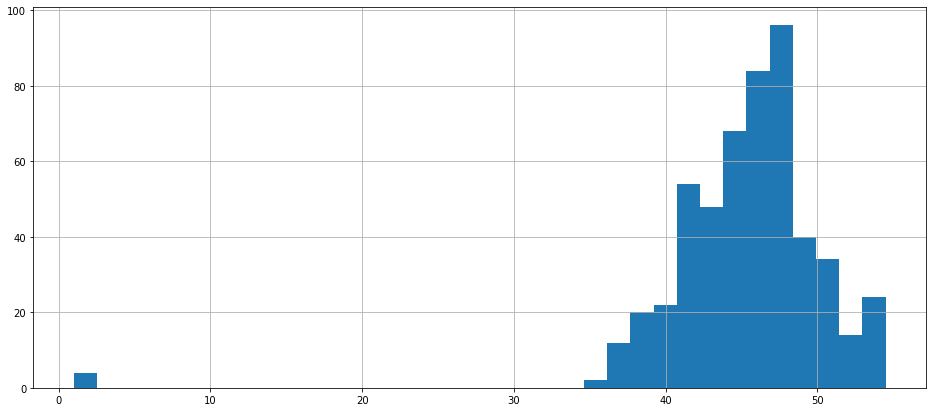

In [98]:
dfCopy["open_total"].hist(bins=35,figsize=(16,7))

<AxesSubplot:>

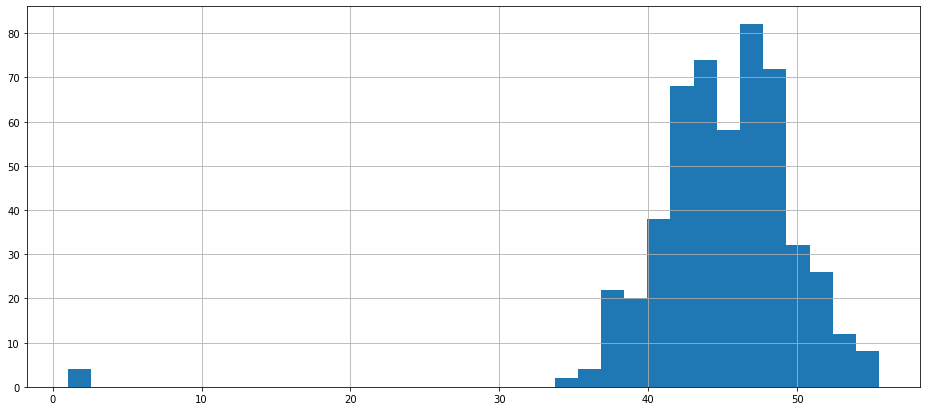

In [99]:
dfCopy["close_total"].hist(bins=35,figsize=(16,7))